# Import Libraries

In [32]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import label_binarize

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from tqdm import tqdm

In [33]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [34]:
path_to_save = './../results/03c_modeling_lr'

# Loading data & preprocessing

## Train data

In [35]:
path_to_ftir_train_data = './../data/processed_data/ftir_engineered_features_train.csv'

In [36]:
data_train = pd.read_csv(path_to_ftir_train_data, index_col=0)

# data_train.index = data.index.astype(str)

print(data_train.shape)
data_train.head(3)

(25, 81)


,$(ΣI)_{n}$,$(ΣS)_{n}$,"$I_{1619, n}$","$S_{1619, n}$","$I_{1720, n}$","$S_{1720, n}$",$(\frac{ΣI}{ΣS})_{n}$,$(\frac{ΣI}{I_{1619}})_{n}$,$(\frac{ΣI}{S_{1619}})_{n}$,$(\frac{ΣI}{I_{1720}})_{n}$,$(\frac{ΣI}{S_{1720}})_{n}$,$(\frac{ΣS}{I_{1619}})_{n}$,$(\frac{ΣS}{S_{1619}})_{n}$,$(\frac{ΣS}{I_{1720}})_{n}$,$(\frac{ΣS}{S_{1720}})_{n}$,$(\frac{I_{1619}}{S_{1619}})_{n}$,$(\frac{I_{1619}}{I_{1720}})_{n}$,$(\frac{I_{1619}}{S_{1720}})_{n}$,$(\frac{S_{1619}}{I_{1720}})_{n}$,$(\frac{S_{1619}}{S_{1720}})_{n}$,$(\frac{I_{1720}}{S_{1720}})_{n}$,$(ΣI^{-1})_{n}$,$(ΣI^2)_{n}$,$(ΣI^{-2})_{n}$,$(ΣI^3)_{n}$,...,$(S_{1619}^{-5})_{n}$,$(I_{1720}^{-1})_{n}$,$(I_{1720}^2)_{n}$,$(I_{1720}^{-2})_{n}$,$(I_{1720}^3)_{n}$,$(I_{1720}^{-3})_{n}$,$(I_{1720}^4)_{n}$,$(I_{1720}^{-4})_{n}$,$(I_{1720}^5)_{n}$,$(I_{1720}^{-5})_{n}$,$(S_{1720}^{-1})_{n}$,$(S_{1720}^2)_{n}$,$(S_{1720}^{-2})_{n}$,$(S_{1720}^3)_{n}$,$(S_{1720}^{-3})_{n}$,$(S_{1720}^4)_{n}$,$(S_{1720}^{-4})_{n}$,$(S_{1720}^5)_{n}$,$(S_{1720}^{-5})_{n}$,$(ln|ΣI|)_{n}$,$(ln|ΣS|)_{n}$,$(ln|I_{1619}|)_{n}$,$(ln|S_{1619}|)_{n}$,$(ln|I_{1720}|)_{n}$,$(ln|S_{1720}|)_{n}$
1,2.9151,120.871839,0.619070,3.720943,0.664008,30.809158,0.024117,4.708838,0.783430,4.390159,0.094618,195.247462,32.484193,182.033770,3.923244,0.166374,0.932323,0.020094,5.603765,0.120774,0.021552,0.343041,8.497808,0.117677,24.771960,...,0.001402,1.506006,0.440906,2.268055,0.292765,3.415706,0.194398,5.144075,0.129082,7.747011,0.032458,949.204210,0.001054,29244.182358,0.000034,900988.631502,0.000001,2.775870e+07,3.602474e-08,1.069904,4.794731,-0.479537,1.313977,-0.409461,3.427812
2,3.9398,91.038462,0.670413,12.073326,0.481810,0.972930,0.043276,5.876673,0.326323,8.177088,4.049420,135.794536,7.540462,188.951098,93.571485,0.055528,1.391448,0.689067,25.058291,12.409251,0.495215,0.253820,15.522024,0.064425,61.153670,...,0.000004,2.075508,0.232141,4.307735,0.111848,8.940741,0.053889,18.556584,0.025964,38.514347,1.027824,0.946592,1.056421,0.920967,1.085815,0.896036,1.116026,8.717801e-01,1.147078e+00,1.371130,4.511282,-0.399861,2.490999,-0.730206,-0.027444
3,2.8628,85.811635,0.380586,8.608846,0.355102,4.681582,0.033361,7.522086,0.332542,8.061920,0.611503,225.472431,9.967844,241.653809,18.329623,0.044209,1.071767,0.081294,24.243337,1.838875,0.075851,0.349308,8.195624,0.122016,23.462432,...,0.000021,2.816096,0.126097,7.930397,0.044777,22.332761,0.015900,62.891200,0.005646,177.107662,0.213603,21.917211,0.045626,102.607222,0.009746,480.364133,0.002082,2.248864e+03,4.446689e-04,1.051800,4.452155,-0.966043,2.152790,-1.035352,1.543636


## Test data

In [37]:
path_to_ftir_test_data = './../data/processed_data/ftir_engineered_features_test.csv'

In [38]:
data_test = pd.read_csv(path_to_ftir_test_data, index_col=0)

# data_test.index = data.index.astype(str)

print(data_test.shape)
data_test.head(3)

(4, 81)


,$(ΣI)_{n}$,$(ΣS)_{n}$,"$I_{1619, n}$","$S_{1619, n}$","$I_{1720, n}$","$S_{1720, n}$",$(\frac{ΣI}{ΣS})_{n}$,$(\frac{ΣI}{I_{1619}})_{n}$,$(\frac{ΣI}{S_{1619}})_{n}$,$(\frac{ΣI}{I_{1720}})_{n}$,$(\frac{ΣI}{S_{1720}})_{n}$,$(\frac{ΣS}{I_{1619}})_{n}$,$(\frac{ΣS}{S_{1619}})_{n}$,$(\frac{ΣS}{I_{1720}})_{n}$,$(\frac{ΣS}{S_{1720}})_{n}$,$(\frac{I_{1619}}{S_{1619}})_{n}$,$(\frac{I_{1619}}{I_{1720}})_{n}$,$(\frac{I_{1619}}{S_{1720}})_{n}$,$(\frac{S_{1619}}{I_{1720}})_{n}$,$(\frac{S_{1619}}{S_{1720}})_{n}$,$(\frac{I_{1720}}{S_{1720}})_{n}$,$(ΣI^{-1})_{n}$,$(ΣI^2)_{n}$,$(ΣI^{-2})_{n}$,$(ΣI^3)_{n}$,...,$(S_{1619}^{-5})_{n}$,$(I_{1720}^{-1})_{n}$,$(I_{1720}^2)_{n}$,$(I_{1720}^{-2})_{n}$,$(I_{1720}^3)_{n}$,$(I_{1720}^{-3})_{n}$,$(I_{1720}^4)_{n}$,$(I_{1720}^{-4})_{n}$,$(I_{1720}^5)_{n}$,$(I_{1720}^{-5})_{n}$,$(S_{1720}^{-1})_{n}$,$(S_{1720}^2)_{n}$,$(S_{1720}^{-2})_{n}$,$(S_{1720}^3)_{n}$,$(S_{1720}^{-3})_{n}$,$(S_{1720}^4)_{n}$,$(S_{1720}^{-4})_{n}$,$(S_{1720}^5)_{n}$,$(S_{1720}^{-5})_{n}$,$(ln|ΣI|)_{n}$,$(ln|ΣS|)_{n}$,$(ln|I_{1619}|)_{n}$,$(ln|S_{1619}|)_{n}$,$(ln|I_{1720}|)_{n}$,$(ln|S_{1720}|)_{n}$
33,3.1646,98.905036,0.595940,9.150733,0.387241,4.742433,0.031996,5.310265,0.345830,8.172179,0.667295,165.964730,10.808428,255.409747,20.855338,0.065125,1.538940,0.125661,23.630611,1.929544,0.081654,0.315996,10.014693,0.099853,31.692498,...,1.558549e-05,2.582374,0.149955,6.668653,0.058069,17.220953,0.022487,44.470933,0.008708,114.840560,0.210862,22.490667,0.044463,106.660472,0.009376,505.830097,0.001977,2398.865136,0.000417,1.152027,4.594160,-0.517615,2.213834,-0.948709,1.556550
34,3.7505,104.688202,0.766776,14.711741,0.417319,0.914859,0.035825,4.891261,0.254932,8.987125,4.099539,136.530404,7.115963,250.858818,114.430970,0.052120,1.837384,0.838135,35.252968,16.080883,0.456157,0.266631,14.066250,0.071092,52.755472,...,1.451041e-06,2.396247,0.174155,5.742001,0.072678,13.759254,0.030330,32.970575,0.012657,79.005650,1.093065,0.836967,1.194790,0.765707,1.305983,0.700514,1.427524,0.640871,1.560376,1.321889,4.650986,-0.265561,2.688646,-0.873904,-0.088985
35,3.3627,82.943196,1.000000,19.206562,0.489145,1.463460,0.040542,3.362700,0.175081,6.874645,2.297775,82.943196,4.318482,169.567615,56.676112,0.052066,2.044382,0.683312,39.265559,13.124082,0.334239,0.297380,11.307751,0.088435,38.024575,...,3.826060e-07,2.044382,0.239263,4.179500,0.117034,8.544496,0.057247,17.468218,0.028002,35.711718,0.683312,2.141714,0.466916,3.134311,0.319049,4.586938,0.218010,6.712798,0.148969,1.212744,4.418156,0.000000,2.955252,-0.715096,0.380803


## Samples description

In [39]:
path_to_samples_description = './../data/preprocessed_data/ftir_description.csv'

In [40]:
samples_description = pd.read_csv(path_to_samples_description, index_col=0)

# samples_description.index = samples_description.index.astype(str)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


# Dataset wrangling

## Correction of column `Type`

In [41]:
# type_dict = {
#     '$rGO$': '$вОГ$',
#     '$GO$': '$ОГ$',
#     '$GO_{d}$': '$ОГ_{диализ}$',
# }

# samples_description['Type'] = samples_description['Type'].apply(lambda x: type_dict[x])

# print(samples_description.shape)
# samples_description.head(3)

## Merging data

In [42]:
model_factors_dict = {
    r'$(\frac{S_{1619}}{I_{1720}})_{n}$': r'$\frac{S_{1619}}{I_{1720}}$',
    r'$(ln|I_{1720}|)_{n}$': r'$ln|I_{1720}|$'
}

initial_model_factors = list(model_factors_dict.keys())
model_factors = list(model_factors_dict.values())

In [43]:
model_factors_df = pd.concat([data_train, data_test], axis=0)[initial_model_factors]

model_factors_df = model_factors_df.rename(columns=model_factors_dict)

print(model_factors_df.shape)
model_factors_df.head(3)

(29, 2)


,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$
1,5.603765,-0.409461
2,25.058291,-0.730206
3,24.243337,-1.035352


In [44]:
data = (
    model_factors_df
    .merge(
        right=samples_description,
        how='inner',
        left_index=True,
        right_index=True
    )
)

print(data.shape)
data.head(3)

(29, 6)


,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$,Description,Type,Class,Label
1,5.603765,-0.409461,"MFGO, разб. 1:20",$GO$,1,Train
2,25.058291,-0.730206,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,24.243337,-1.035352,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


## Splitting data to *train/test*

### `Train`

In [45]:
data_train = data.loc[data['Label'] == 'Train']

print(data_train.shape)
data_train.head(3)

(25, 6)


,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$,Description,Type,Class,Label
1,5.603765,-0.409461,"MFGO, разб. 1:20",$GO$,1,Train
2,25.058291,-0.730206,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,24.243337,-1.035352,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


In [46]:
X_train = data_train[model_factors]
y_train = data_train['Class']

print(X_train.shape)
X_train.head(3)

(25, 2)


,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$
1,5.603765,-0.409461
2,25.058291,-0.730206
3,24.243337,-1.035352


### `Test`

In [47]:
data_test = data.loc[data['Label'] == 'Test']

print(data_test.shape)
data_test.head(3)

(4, 6)


,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$,Description,Type,Class,Label
33,23.630611,-0.948709,"GO, RusGraphene",$GO$,1,Test
34,35.252968,-0.873904,Образец GO после диализа (1/2),$GO_{d}$,2,Test
35,39.265559,-0.715096,"Образец GO после диализа, RusGraphene",$GO_{d}$,2,Test


In [48]:
X_test = data_test[model_factors]
y_test = data_test['Class']

print(X_test.shape)
X_test.head(3)

(4, 2)


,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$
33,23.630611,-0.948709
34,35.252968,-0.873904
35,39.265559,-0.715096


# Modeling (*Logistic Regression*)

## Fitting model and metrics calculation

*Fittting model*

In [49]:
estimator = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000
)

In [50]:
estimator.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

*`ROC-AUC` values on `train` part of data set*

In [51]:
# Train
metric_value_train_ovr = roc_auc_score(
    y_true=y_train,
    y_score=estimator.predict_proba(X_train),
    multi_class='ovr' # one-vs-rest
)

metric_value_train_ovo = roc_auc_score(
    y_true=y_train,
    y_score=estimator.predict_proba(X_train),
    multi_class='ovo' # one-vs-one
)

# Test
metric_value_test_ovr = roc_auc_score(
    y_true=y_test,
    y_score=estimator.predict_proba(X_test),
    multi_class='ovr' # one-vs-rest
)

metric_value_test_ovo = roc_auc_score(
    y_true=y_test,
    y_score=estimator.predict_proba(X_test),
    multi_class='ovo' # one-vs-one
)

In [52]:
print(
    f"ROC-AUC values",
    f"(*) Train (OVO): {metric_value_train_ovr}",
    f"(*) Train (OVR): {metric_value_train_ovo}",
    f"(*) Test (OVO): {metric_value_test_ovr}",
    f"(*) Test (OVR): {metric_value_test_ovo}",
    sep="\n"
)

ROC-AUC values
(*) Train (OVO): 1.0
(*) Train (OVR): 1.0
(*) Test (OVO): 1.0
(*) Test (OVR): 1.0


## Selection of regularization coefficient `C`

*Calculation process*

In [53]:
metric_values_lst = []
C_values_lst = np.logspace(-4, 4, 250)

In [54]:
for C in tqdm(C_values_lst):
    tmp_metric_values_lst = []

    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    )
    subsamples_generator = cv.split(X_train, y_train)
    
    for train_idx, test_idx in subsamples_generator:
        # Splitting_data
        X_train_cv = X_train.iloc[train_idx]
        y_train_cv = y_train.iloc[train_idx]

        X_test_cv = X_train.iloc[test_idx]
        y_test_cv = y_train.iloc[test_idx]

        # Fitting LR with fixed value of C
        estimator_cv = LogisticRegression(
            penalty='l2',
            C=C,
            solver='liblinear',
            max_iter=1000
        )
        estimator_cv.fit(X_test_cv, y_test_cv)

        # Calculation pf predict_proba
        y_pred_proba_cv = estimator_cv.predict_proba(X_test_cv)

        # ROC-AUC calculation
        metric_value_test_cv = roc_auc_score(
            y_true=y_test_cv,
            y_score=y_pred_proba_cv,
            multi_class='ovr' # one-vs-rest
        )

        tmp_metric_values_lst.append(metric_value_test_cv)
        
    # Mean metric value for current C value
    tmp_mean_metric = np.mean(tmp_metric_values_lst)
    metric_values_lst.append(tmp_mean_metric)

100%|████████████████████████████████████████| 250/250 [00:01<00:00, 130.79it/s]


In [55]:
c_metric_df = pd.DataFrame({
    'c': C_values_lst,
    'metric': metric_values_lst
})

print(c_metric_df.shape)
c_metric_df.head(3)

(250, 2)


,c,metric
0,0.000100,0.728439
1,0.000108,0.728439
2,0.000116,0.728439


*Visualization of dependence between ROC-AUC and inverse of regularization coefficient*

In [56]:
fontsize = 14

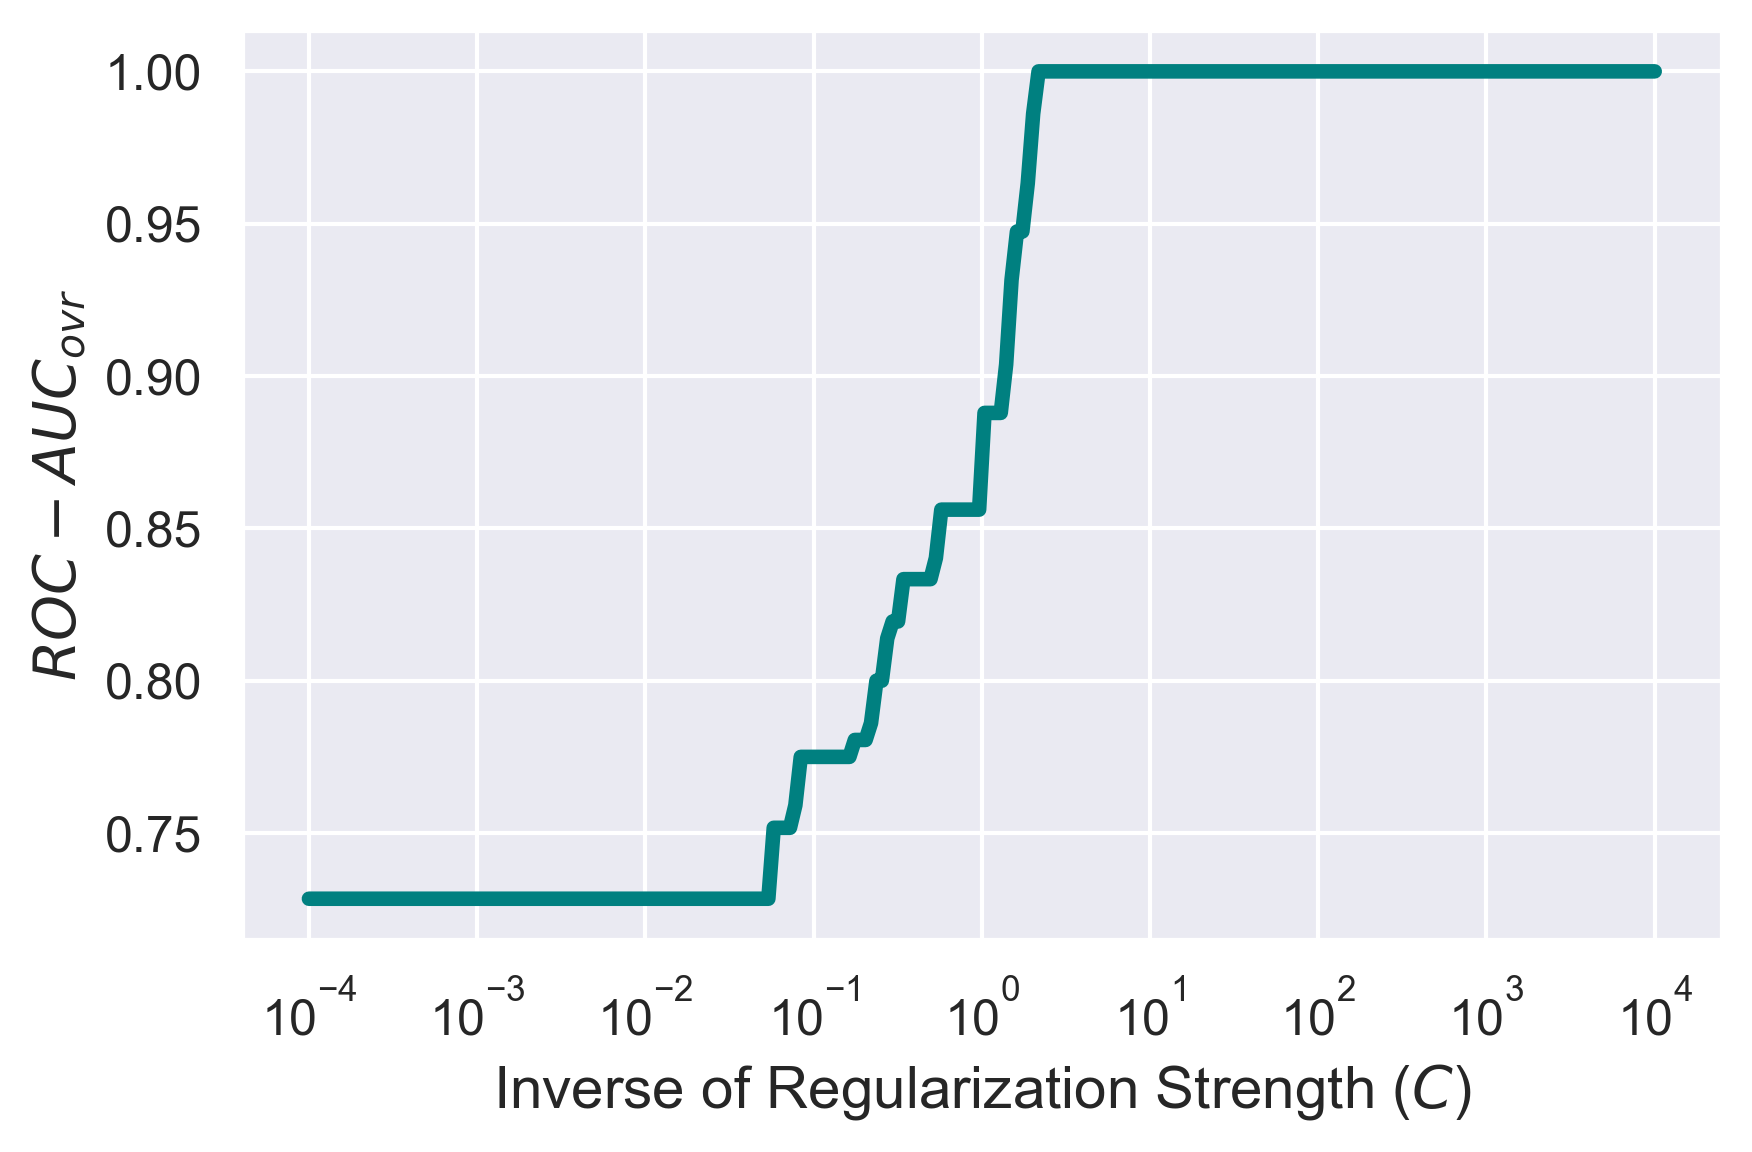

In [57]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

sns.lineplot(
    data=c_metric_df,
    x='c',
    y='metric',
    color='teal',
    linewidth=3.5,
    ax=ax
)

ax.set_xlabel('Inverse of Regularization Strength ($C$)', fontsize=fontsize)
ax.set_ylabel('$ROC-AUC_{ovr}$', fontsize=fontsize)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize-2)

ax.set_xscale('log')

plt.tight_layout()

plt.savefig(f'{path_to_save}/c_optimization_curve.png', dpi=600)

plt.show()

In [58]:
c_opt_index = c_metric_df['metric'].idxmax()
c_opt = c_metric_df.loc[c_opt_index, 'c']

print(f"Optimal value of C: {c_opt}")

Optimal value of C: 2.174449858709829


## Training the final model

In [59]:
estimator = LogisticRegression(
    penalty='l2',
    C=c_opt,
    solver='lbfgs',
    max_iter=1000
)

In [60]:
estimator.fit(X_train, y_train)

LogisticRegression(C=2.174449858709829, max_iter=1000)

In [61]:
estimator_parameters_df = pd.DataFrame(estimator.coef_, columns=X_train.columns)
estimator_parameters_df['Intercept'] = estimator.intercept_
estimator_parameters_df.index = estimator.classes_

estimator_parameters_df

,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$,Intercept
0,0.242913,-1.706415,-10.213792
1,-0.533054,-0.004362,17.080863
2,0.290141,1.710777,-6.867072


*Calculation of predictions*

In [62]:
y_true = data['Class']

y_score = estimator.predict_proba(data[model_factors])
y_pred = estimator.predict(data[model_factors])

*Data wrangling*

In [63]:
class_type_dict = {
    0: '$rGO$',
    1: '$GO$',
    2: '$GO_{d}$'
}

class_color_dict = {
    '$rGO$': 'Goldenrod',
    '$GO$': 'RoyalBlue',
    '$GO_{d}$': 'SeaGreen'
}

In [64]:
n_classes = data['Class'].nunique()
y_true_bin = label_binarize(y=y_true, classes=np.arange(n_classes))

## ROC-curves visualization

*Binarization of class labels*

In [65]:
n_classes = data['Class'].nunique()
y_true_bin = label_binarize(y=y_true, classes=np.arange(n_classes))

*ROC-curve plots*

In [66]:
fontsize = 14

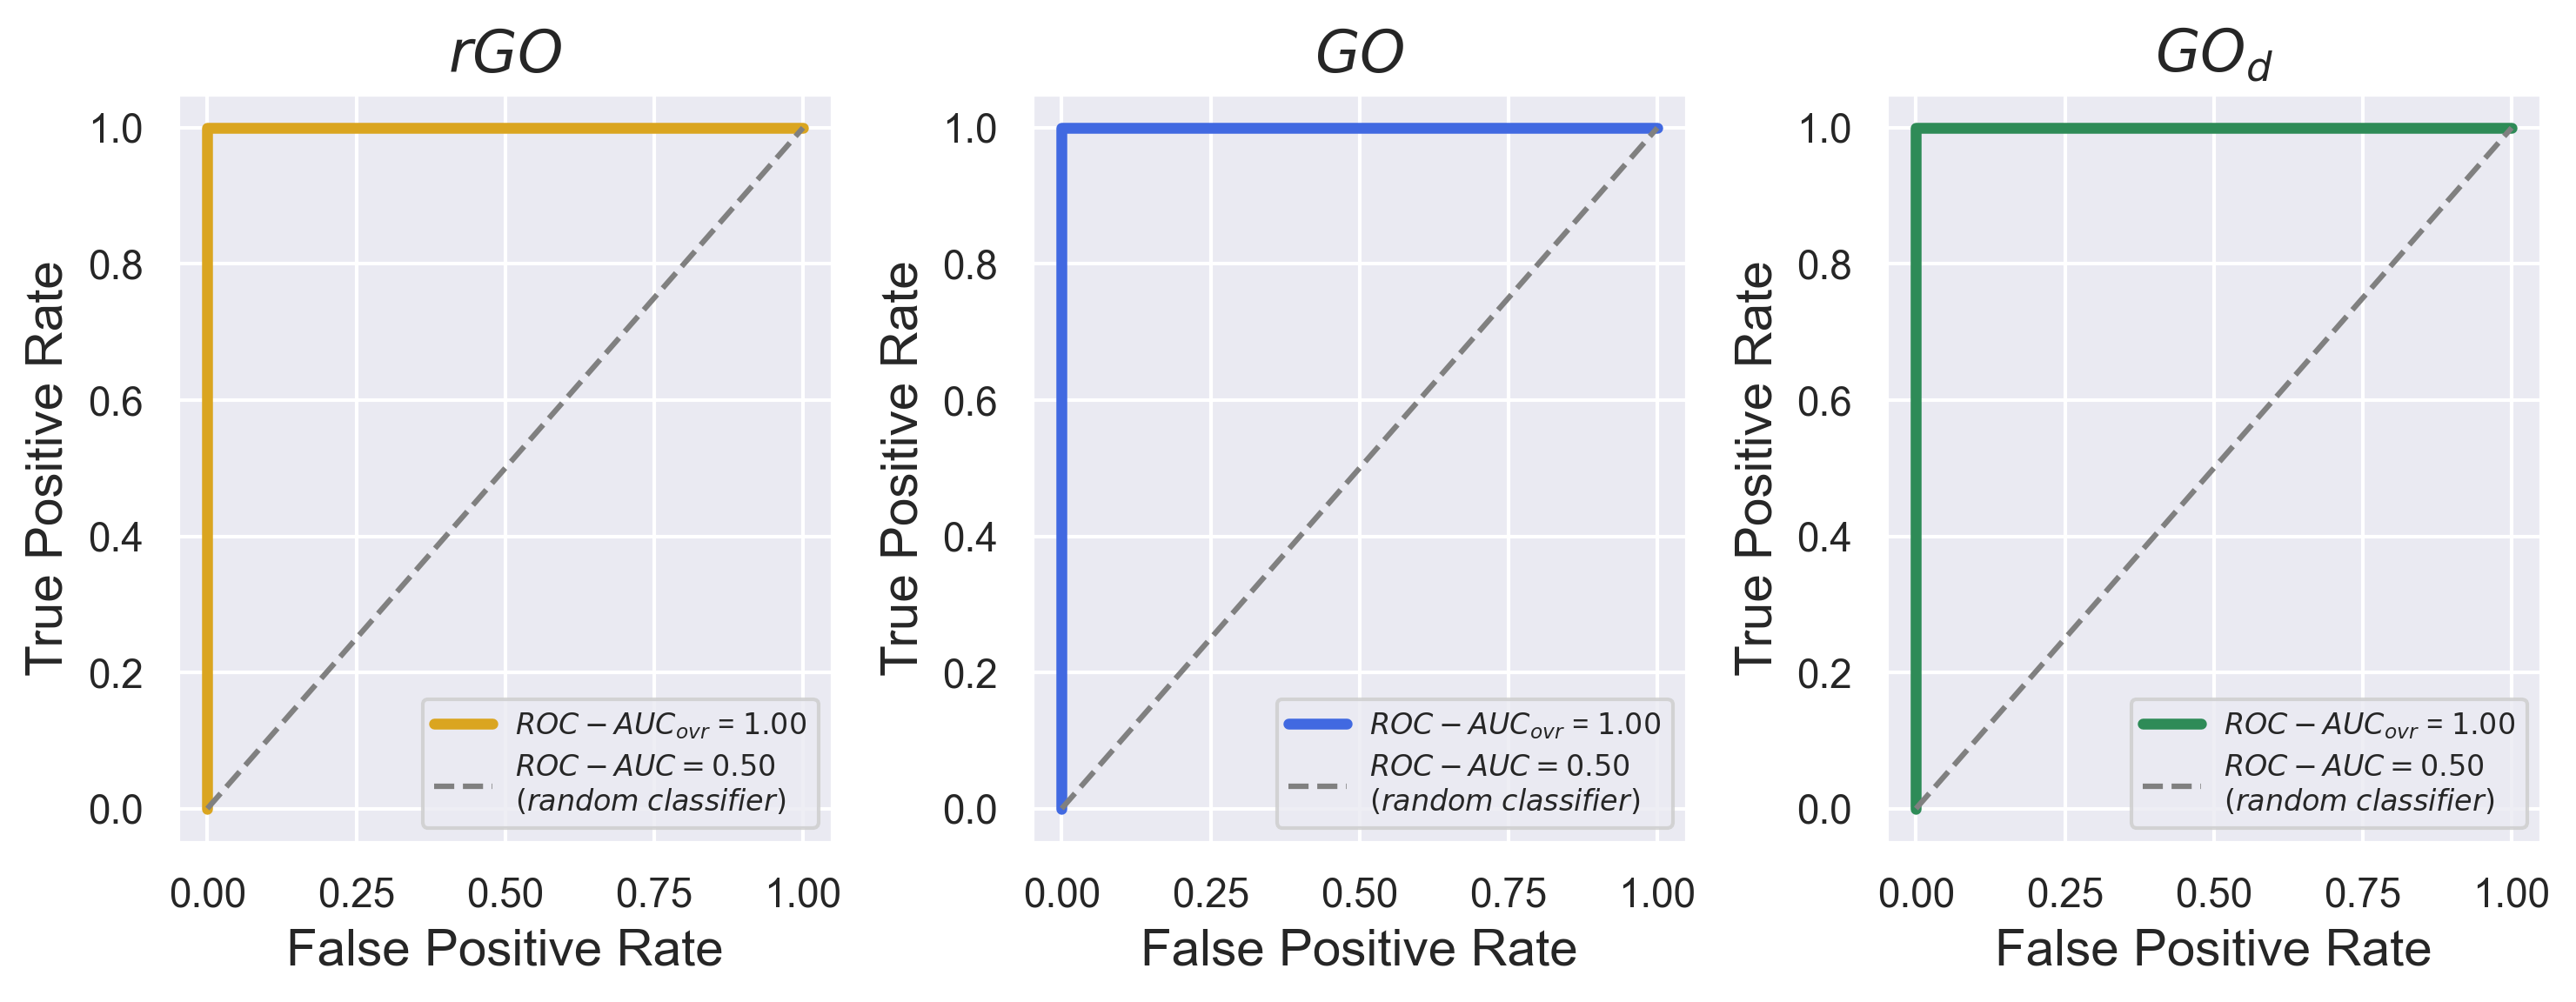

In [67]:
sns.set_theme()

nrows = 1
ncols = 3

# Создаем фигуру с тремя осями
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4), dpi=300)

for i, (class_, class_name) in enumerate(class_type_dict.items()):
    fpr, tpr, _ = roc_curve(y_true=y_true_bin[:, i], y_score=y_score[:, i])
    roc_auc = roc_auc_score(y_true=y_true_bin[:, i], y_score=y_score[:, i])

    ax = axes[i]  # Берем нужную ось из массива

    ax.grid(True)

    ax.plot(
        fpr,
        tpr,
        lw=3,
        color=class_color_dict[class_name],
        linestyle='-',
        label=f'$ROC-AUC_{{ovr}}$ = ${roc_auc:.2f}$'
    )

    ax.plot(
        [0, 1],
        [0, 1],
        color='gray',
        linestyle='--',
        lw=1.5,
        label='$ROC-AUC = 0.50$\n$(random$ $classifier)$'
    )

    ax.set_title(class_name, fontsize=16)
    ax.set_xlabel('False Positive Rate', fontsize=14)
    ax.set_ylabel('True Positive Rate', fontsize=14)

    ax.legend(loc='lower right', fontsize=8)

plt.tight_layout()

plt.savefig(f'{path_to_save}/roc_curves_3_subplots.png', dpi=600)

plt.show()


## PR-curves visualization

In [68]:
fontsize = 18

Macro PR-AUC: 1.0
Micro PR-AUC: 1.0
Weighted PR-AUC: 1.0


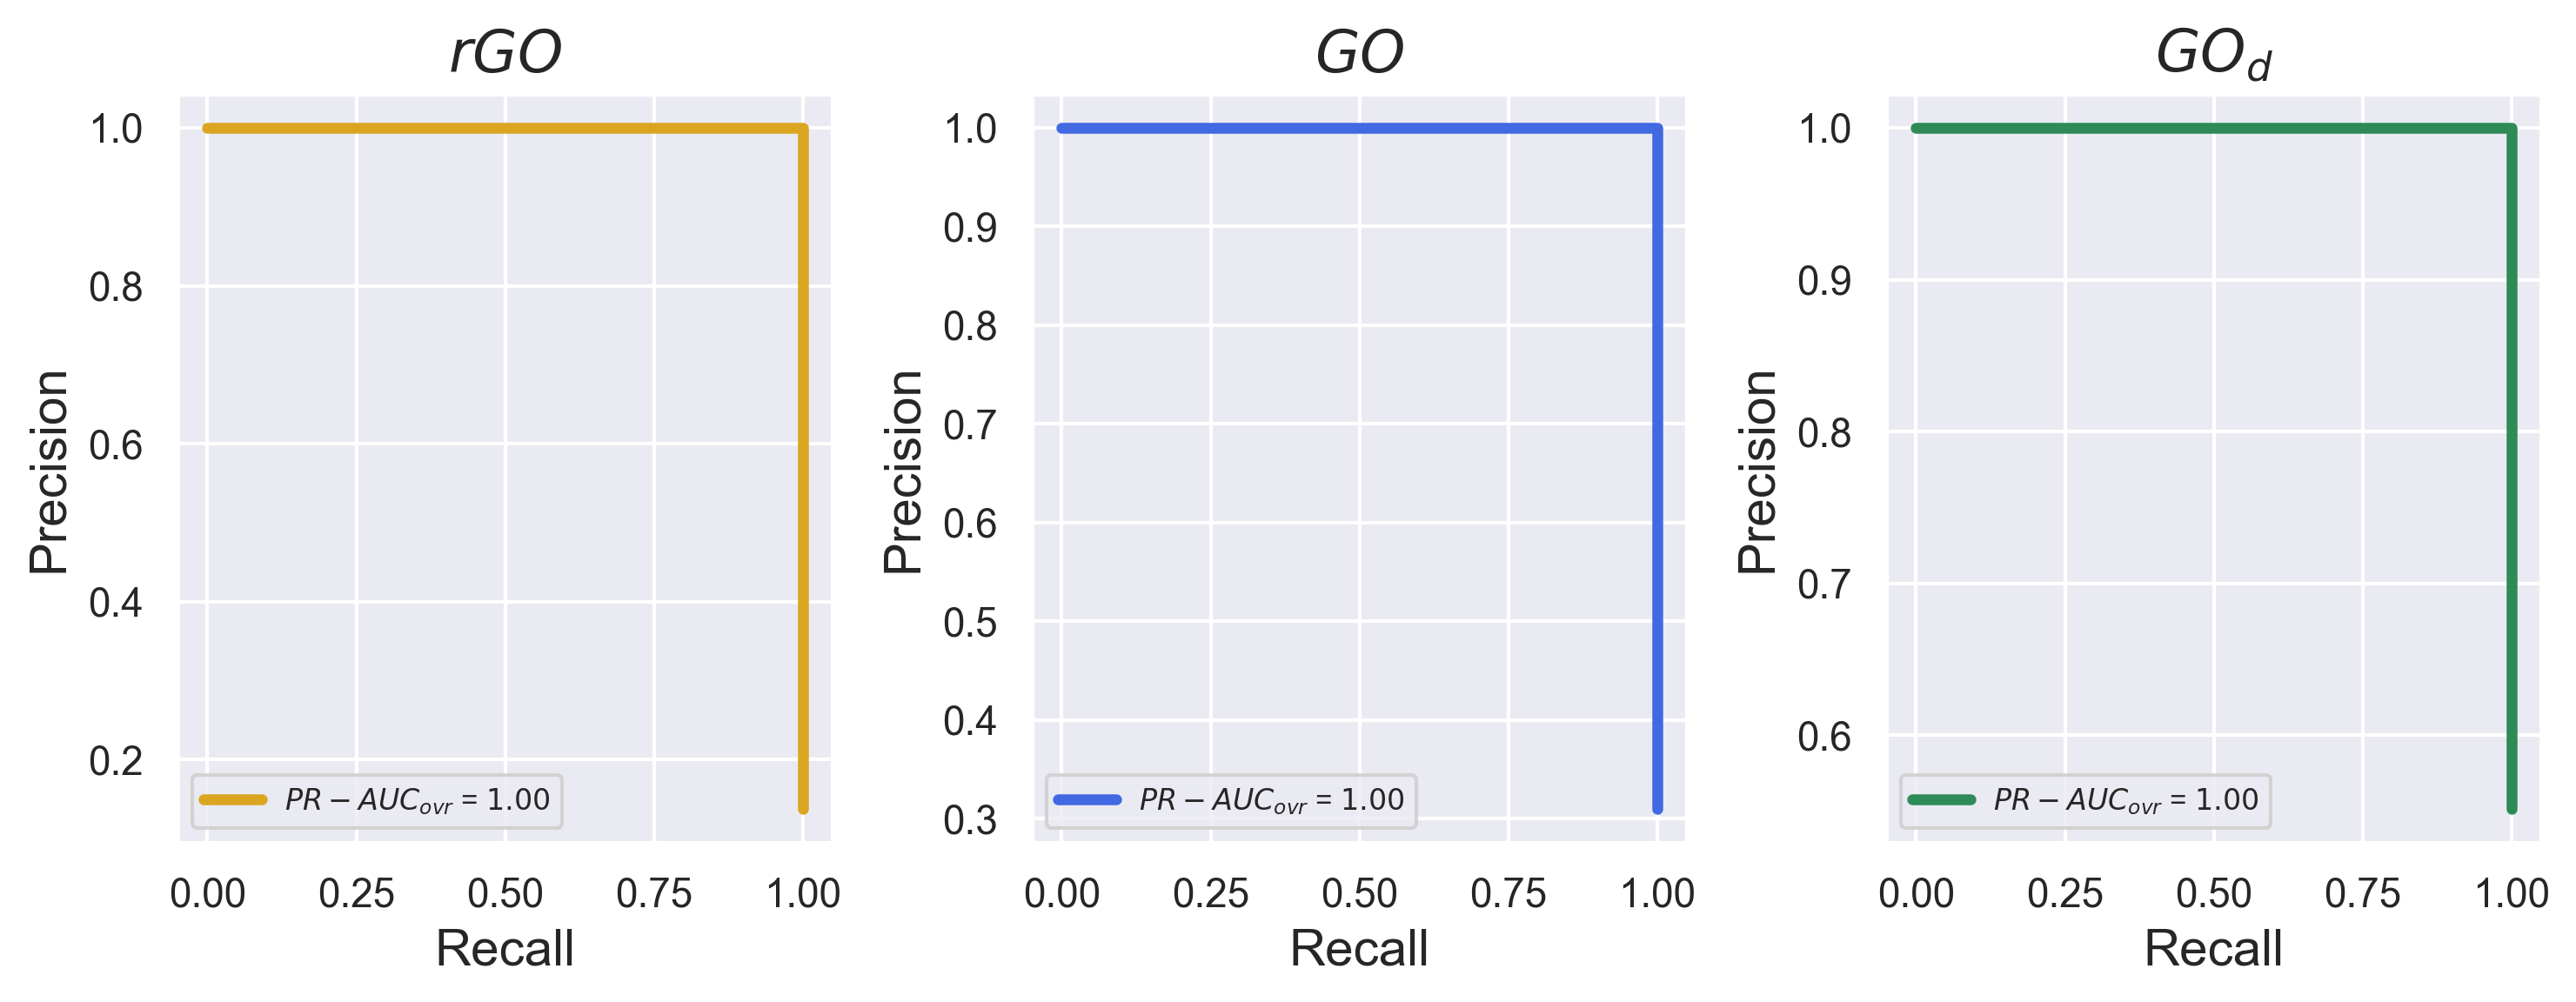

In [69]:
sns.set_theme()

nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4), dpi=300)

for i, (class_, class_name) in enumerate(class_type_dict.items()):
    precision, recall, _ = precision_recall_curve(y_true=y_true_bin[:, i], probas_pred=y_score[:, i])
    pr_auc = average_precision_score(y_true=y_true_bin[:, i], y_score=y_score[:, i])

    ax = axes[i]
    ax.grid(True)

    ax.plot(
        recall,
        precision,
        lw=3,
        color=class_color_dict[class_name],
        linestyle='-',
        label=f'$PR-AUC_{{ovr}}$ = ${pr_auc:.2f}$'
    )

    ax.set_title(class_name, fontsize=16)
    ax.set_xlabel('Recall', fontsize=14)
    ax.set_ylabel('Precision', fontsize=14)

    ax.legend(loc='lower left', fontsize=8)

pr_auc_macro = round(average_precision_score(y_true_bin, y_score, average="macro"), 2)
pr_auc_micro = round(average_precision_score(y_true_bin, y_score, average="micro"), 2)
pr_auc_weighted = round(average_precision_score(y_true_bin, y_score, average="weighted"), 2)

print(
    f'Macro PR-AUC: {pr_auc_macro}',
    f'Micro PR-AUC: {pr_auc_micro}',
    f'Weighted PR-AUC: {pr_auc_weighted}',
    sep='\n'
)

plt.tight_layout()

plt.savefig(f'{path_to_save}/pr_curves_3_subplots.png', dpi=600)

plt.show()

## Cut-off selection

In [70]:
fontsize = 14

Optimized cut-off values:
Class 0 ($rGO$): 0.48
Class 1 ($GO$): 0.99
Class 2 ($GO_{d}$): 0.82


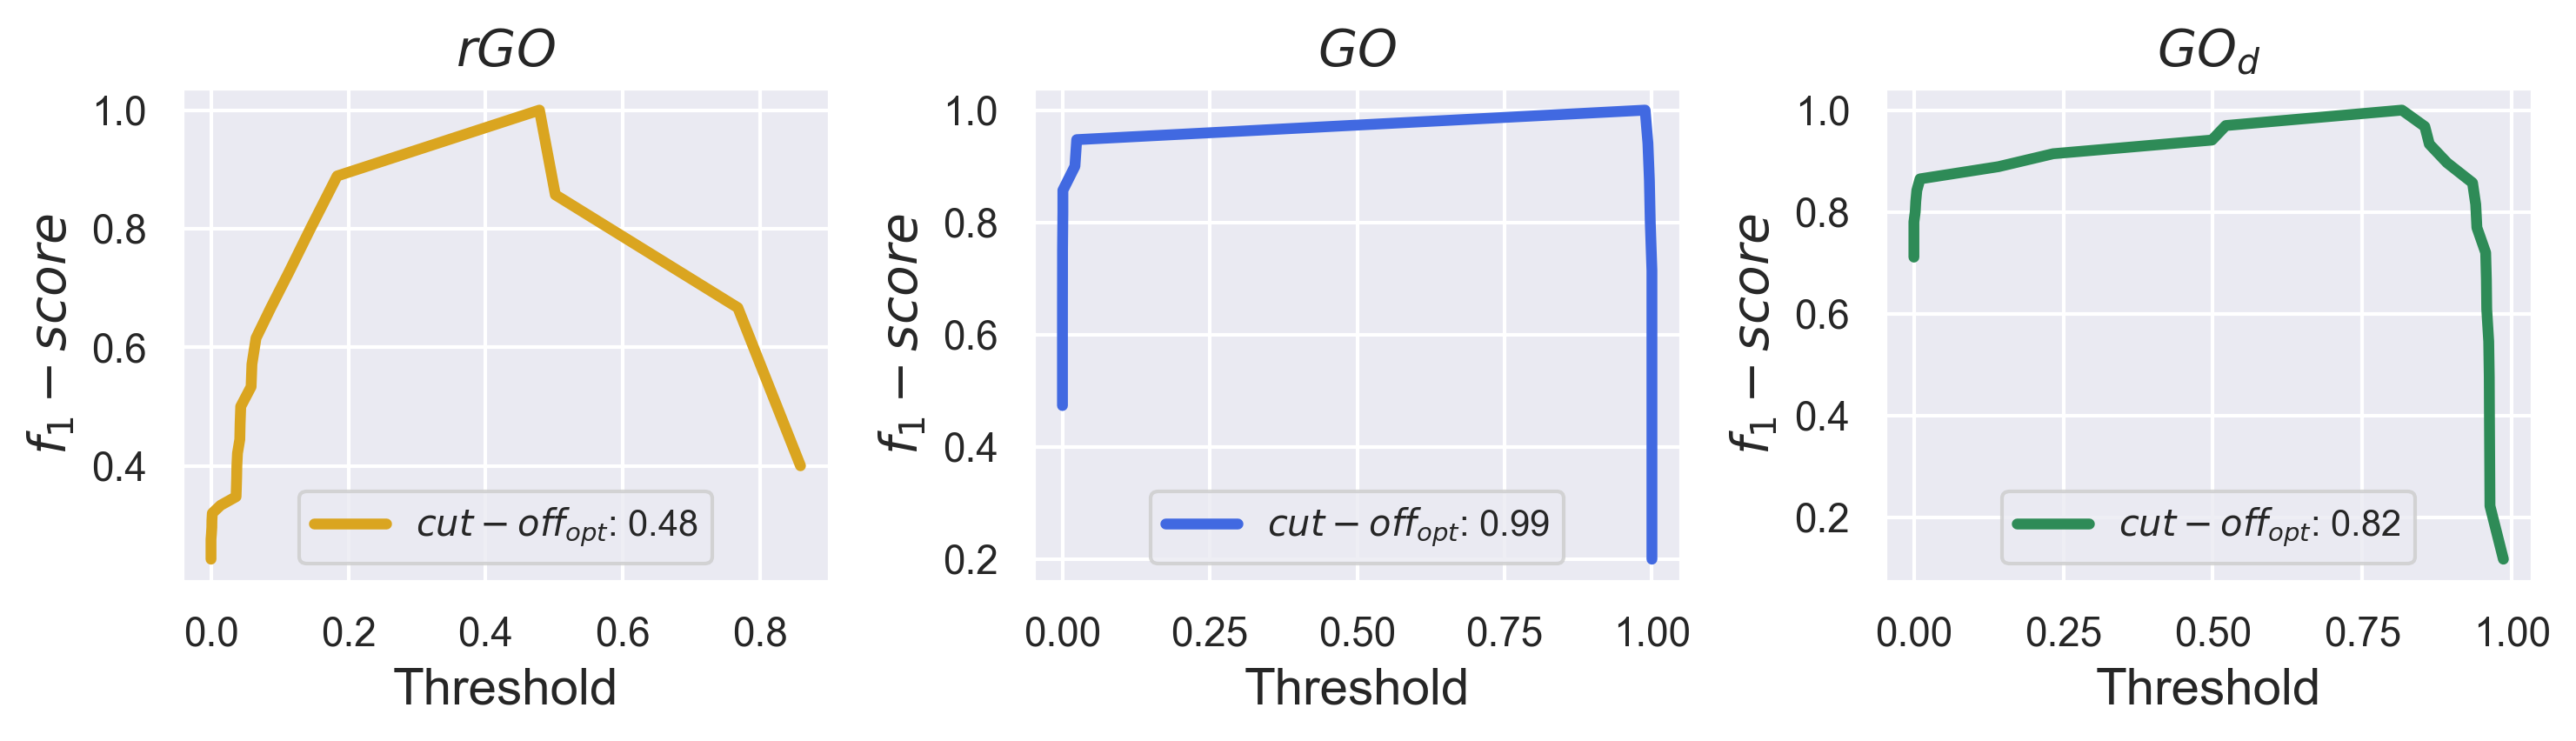

In [71]:
sns.set_theme()

class_cutoffs = {}

nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 3), dpi=300)

for i, (class_, class_name) in enumerate(class_type_dict.items()):
    precision, recall, thresholds = precision_recall_curve(y_true_bin[:, i], y_score[:, i])

    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)

    best_t = thresholds[np.argmax(f1_scores[:-1])]
    class_cutoffs[(class_, class_name)] = best_t

    ax = axes[i]
    ax.grid(True)

    ax.plot(
        thresholds,
        f1_scores[:-1],
        lw=3,
        color=class_color_dict[class_name],
        linestyle='-',
        label=rf'$cut-off_{{opt}}$: {best_t:.2f}'
    )

    ax.set_title(class_name, fontsize=fontsize)
    ax.set_xlabel("Threshold", fontsize=fontsize)
    ax.set_ylabel("$f_{1}-score$", fontsize=fontsize)

    ax.legend(loc='lower center', fontsize=fontsize-4)

print("Optimized cut-off values:")
for (class_, class_name), cutoff in class_cutoffs.items():
    print(f"Class {class_} ({class_name}): {cutoff:.2f}")

plt.tight_layout()

plt.savefig(f'{path_to_save}/cutoff_optimization_3_subplots.png', dpi=600)

plt.show()

## Confusion matrix

### For each class

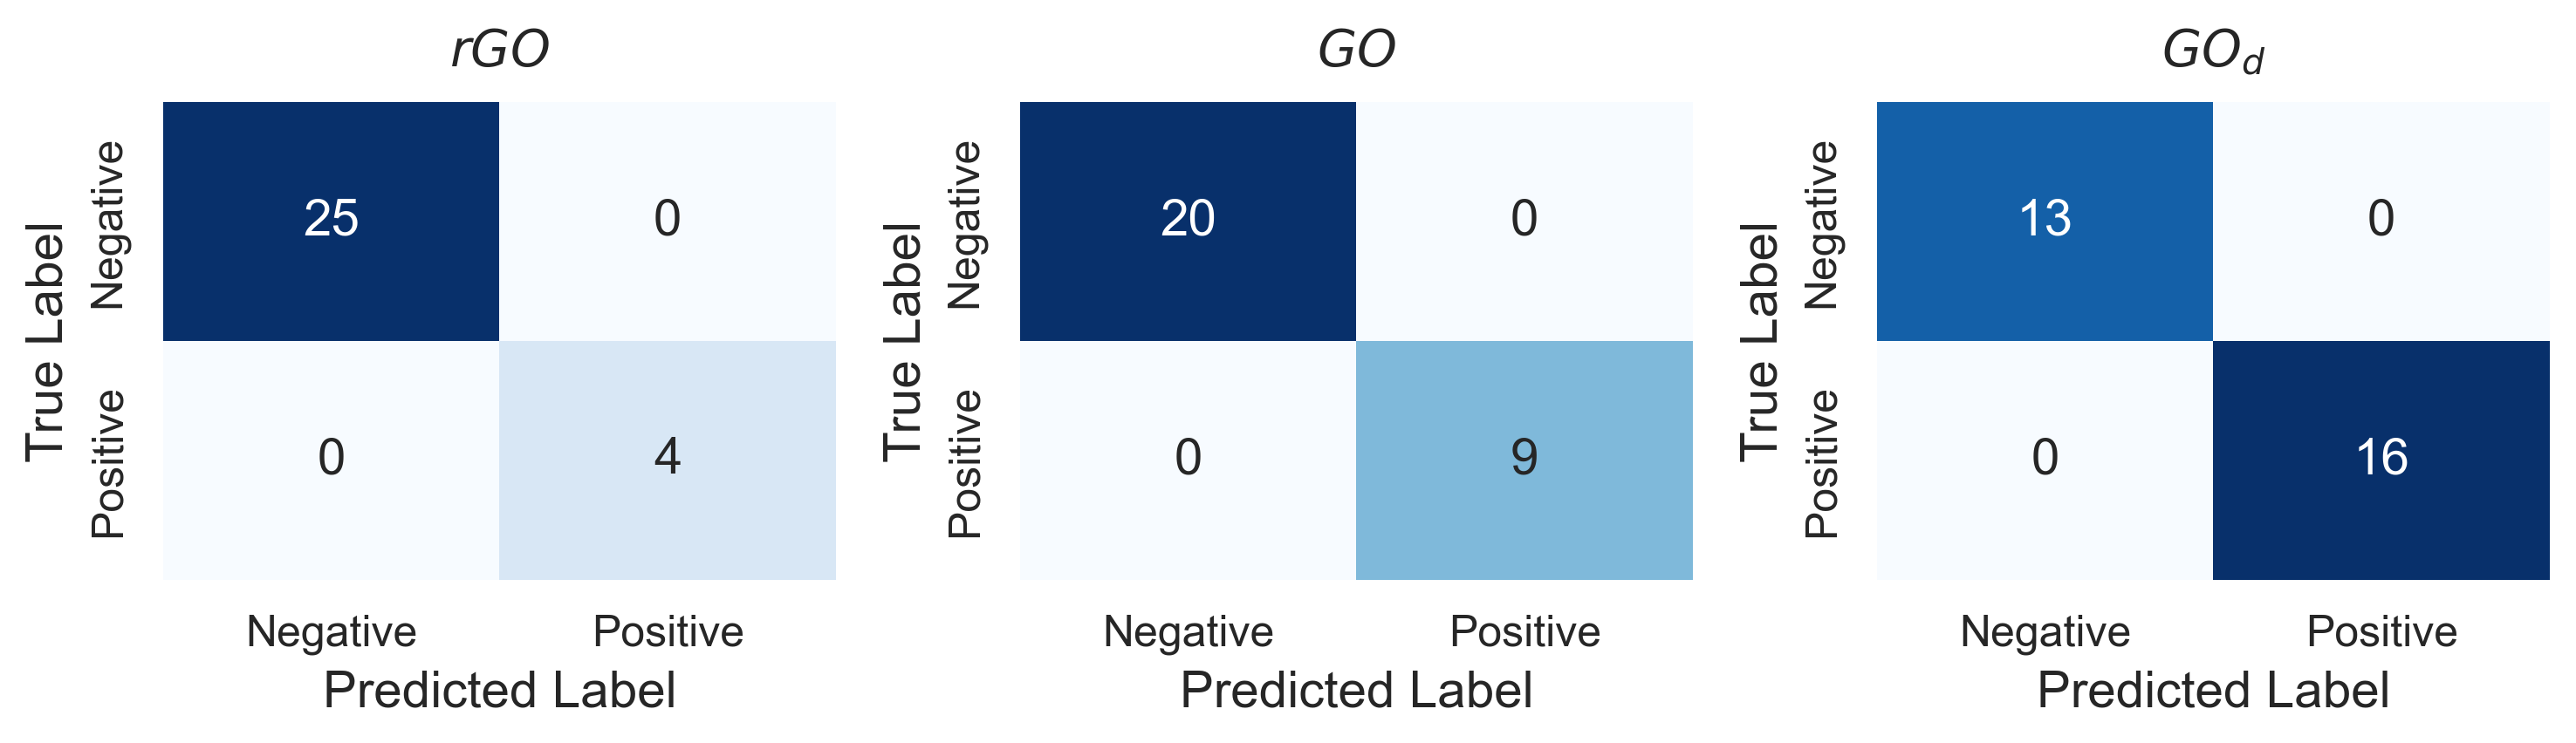

In [72]:
sns.set_theme()

nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 3), dpi=300)

y_pred_bin = np.zeros_like(y_score)

for i, class_ in enumerate(class_cutoffs.keys()):
    y_pred_bin[:, i] = (y_score[:, i] >= class_cutoffs[class_]).astype(int)

for i, (class_, class_name) in enumerate(class_type_dict.items()):
    cm = confusion_matrix(y_true_bin[:, class_], y_pred_bin[:, class_])

    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, annot_kws={"size": 14})

    ax.set_title(f"{class_name}", fontsize=fontsize, pad=10)
    ax.set_xlabel("Predicted Label", fontsize=fontsize)
    ax.set_ylabel("True Label", fontsize=fontsize)

    # Установка правильных тиков и центрирование
    class_labels = ["Negative", "Positive"]
    ax.set_xticks(np.arange(len(class_labels)) + 0.5)
    ax.set_yticks(np.arange(len(class_labels)) + 0.5)
    ax.set_xticklabels(class_labels, fontsize=fontsize-2, ha='center')
    ax.set_yticklabels(class_labels, fontsize=fontsize-2, va='center')

    ax.tick_params(axis='x', bottom=False, top=False)
    ax.tick_params(axis='y', left=False, right=False)

plt.tight_layout()

plt.savefig(f'{path_to_save}/confusion_matrix_3_subplots.png', dpi=600)

plt.show()

### Overall

*Predictions calculaion*

In [73]:
y_pred_bin = np.zeros_like(y_score)

for i, class_ in enumerate(class_cutoffs.keys()):
    y_pred_bin[:, i] = (y_score[:, i] >= class_cutoffs[class_]).astype(int)

# Case when several classes get flag = 1
y_pred = np.full(y_true_bin.shape[0], fill_value=-1)
for i in range(y_pred_bin.shape[0]):
    possible_classes = np.where(y_pred_bin[i] == 1)[0]  # Cases when class = 1

    if len(possible_classes) == 1:
        y_pred[i] = possible_classes[0]  # Case when only 1 observation has flag = 1
    elif len(possible_classes) > 1:
        y_pred[i] = possible_classes[np.argmax(y_score[i, possible_classes])]  # Case when > 1 observations have flag = 1 => select class with max probability 
    else:
        y_pred[i] = np.argmax(y_score[i])  # Case when no observations with flag = 1  argmax on probability

y_true = np.argmax(y_true_bin, axis=1)

cm = confusion_matrix(y_true, y_pred)

*Visualization of confusion matrix*

In [74]:
fontsize = 16

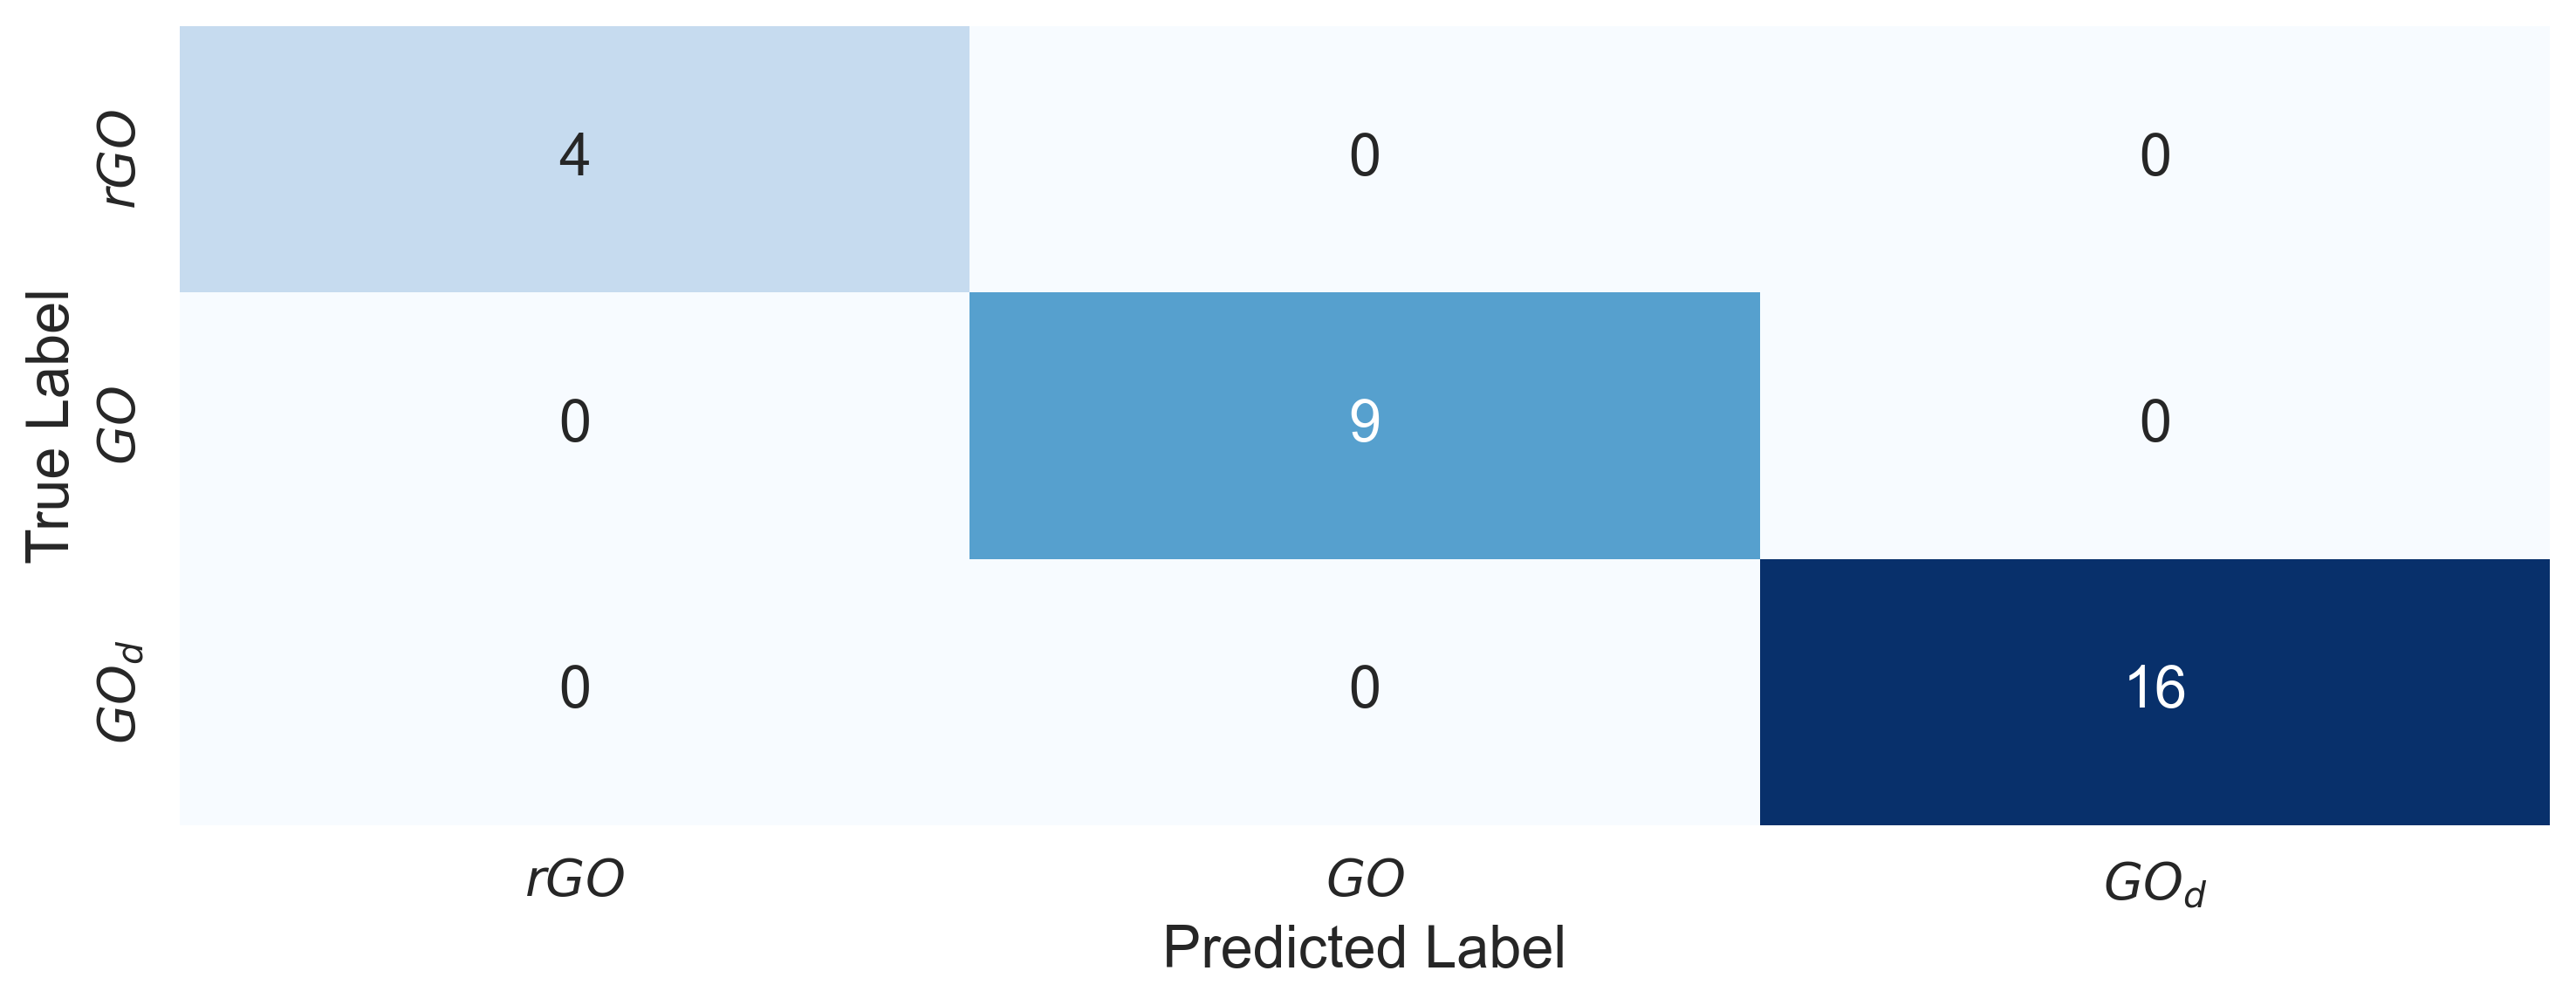

In [75]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 4), dpi=300)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, annot_kws={"size": fontsize})

ax.set_xlabel("Predicted Label", fontsize=fontsize)
ax.set_ylabel("True Label", fontsize=fontsize)
# ax.set_title("Overall Confusion Matrix", fontsize=16)

# Установка правильных тиков и их центрирование
class_labels = ['$rGO$', '$GO$', '$GO_{d}$']

ax.set_xticks(np.arange(len(class_labels)) + 0.5)  # Смещаем тики в центр ячеек
ax.set_yticks(np.arange(len(class_labels)) + 0.5)

ax.set_xticklabels(class_labels, fontsize=fontsize-2, ha='center')
ax.set_yticklabels(class_labels, fontsize=fontsize-2, va='center')

ax.tick_params(axis='x', bottom=False, top=False)  # Отключаем лишние тики
ax.tick_params(axis='y', left=False, right=False)

plt.tight_layout()

plt.savefig(f'{path_to_save}/confusion_matrix_overalll.png', dpi=600)

plt.show()

## Scatter plot of data (`Train` +`Validation`)

### All sample types

In [76]:
fontsize = 18

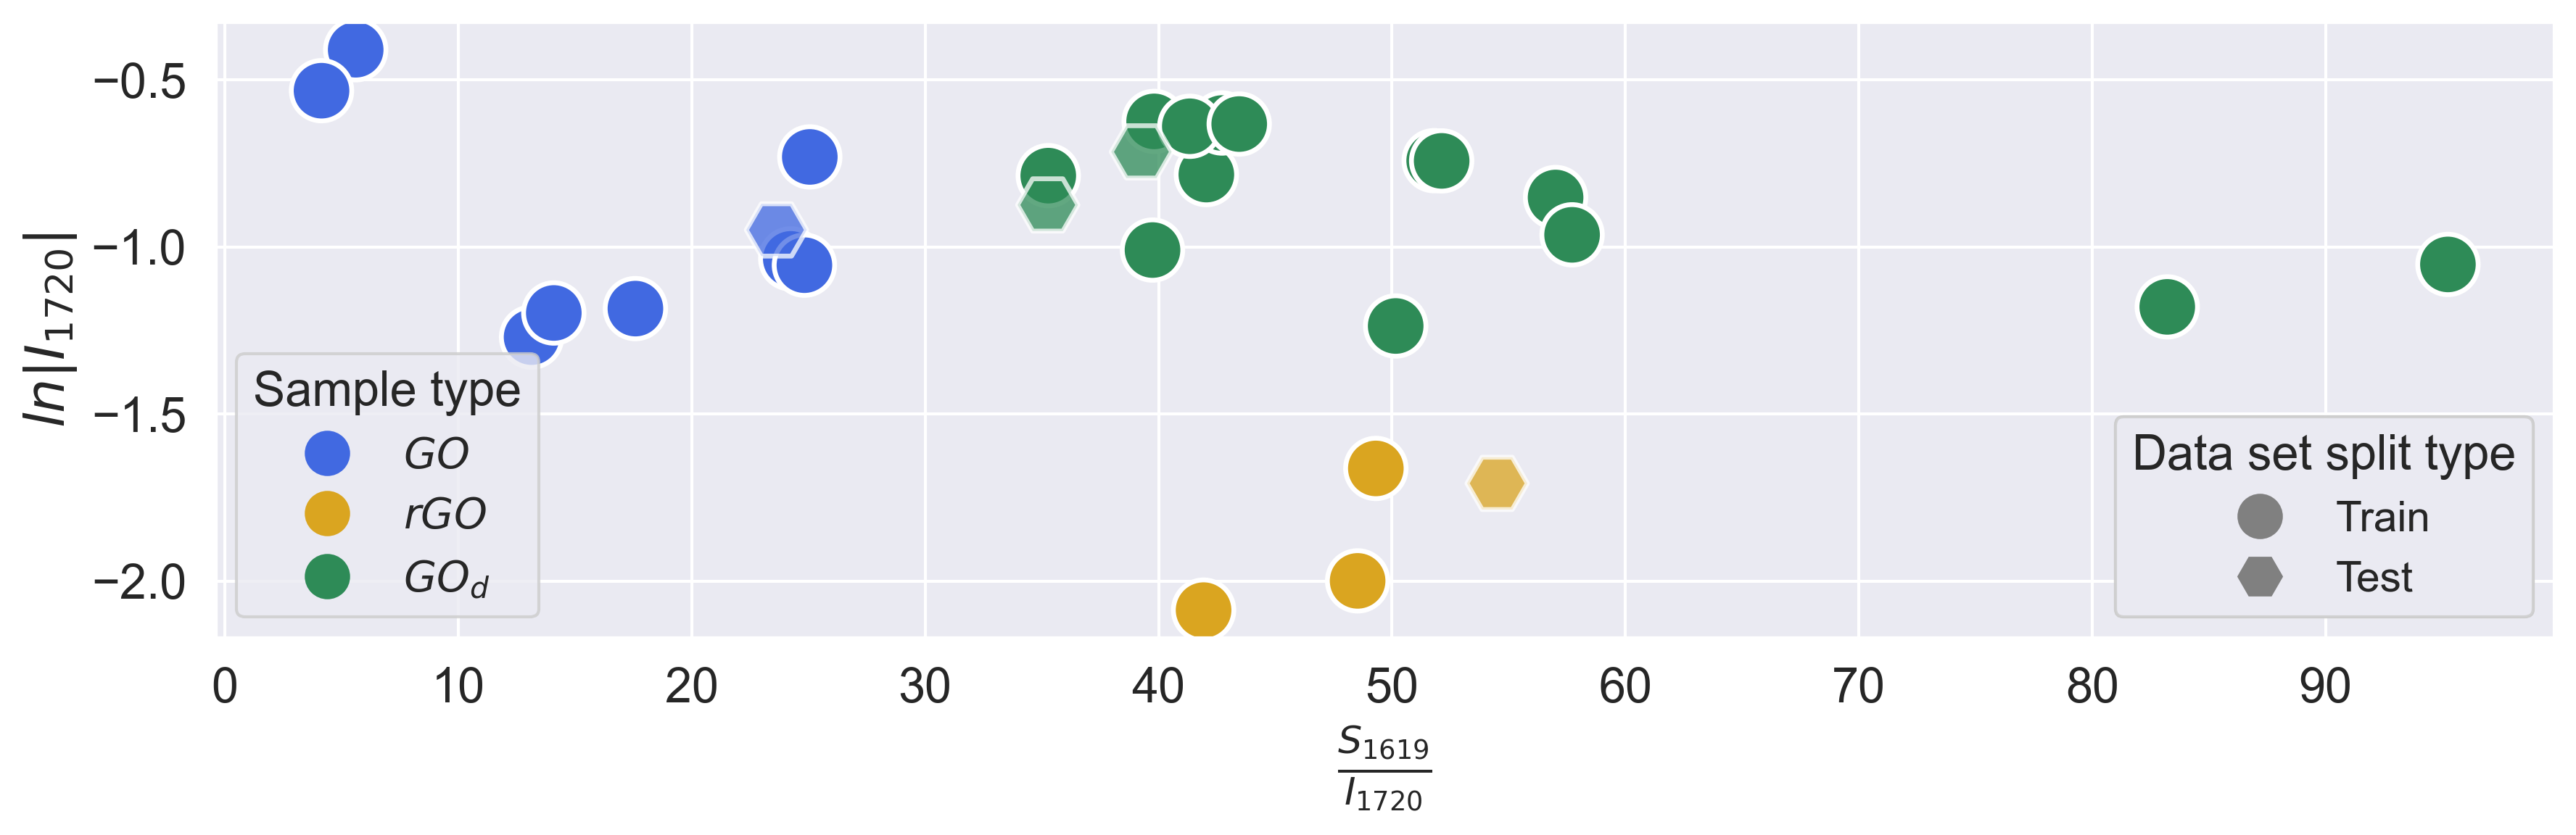

In [77]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=300)
ax.grid(True)

unique_types = data['Type'].unique()
palette = {type_: class_color_dict[type_] for type_ in unique_types}

marker_dict = {'Train': 'o', 'Test': 'H'}
alpha_dict = {'Train': 1.0, 'Test': 0.75}

for label in data['Label'].unique():
    subset = data[data['Label'] == label]
    
    sns.scatterplot(
        data=subset,
        x=model_factors[0],
        y=model_factors[1],
        hue=subset['Type'],
        palette=palette,
        style=subset['Label'],
        markers=marker_dict,
        s=400,
        alpha=alpha_dict[label],
        ax=ax
    )

ax.set_xlabel(model_factors[0], fontsize=fontsize)
ax.set_ylabel(model_factors[1], fontsize=fontsize)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='both', which='major', labelsize=fontsize - 2)

# Legend for 'Type'
handles_hue = [
    plt.Line2D([0], [0], color=palette[type_], marker='o', linestyle='', markersize=14) 
    for type_ in unique_types
]
legend_hue = ax.legend(
    handles_hue,
    unique_types,
    title="Sample type",
    loc='lower left',
    fontsize=fontsize - 4,
    title_fontsize=fontsize - 2,
)

# Legend for 'Label'
unique_labels = ['Train', 'Test']
handles_label = [
    plt.Line2D(
        [0], [0], 
        color='gray', 
        marker=marker_dict[label], 
        linestyle='', 
        markersize=14
    ) 
    for label in unique_labels
]

legend_label = ax.legend(
    handles_label,
    unique_labels,
    title="Data set split type",
    loc='lower right',
    fontsize=fontsize - 4,
    title_fontsize=fontsize - 2,
)

ax.add_artist(legend_hue)
ax.add_artist(legend_label)

plt.tight_layout()

plt.savefig(f'{path_to_save}/scatterplot_train_val_all.png', dpi=600)

plt.show()

### $GO_{dialysis}$

In [78]:
vis_data = (
    data
    .copy()
    .loc[data['Type'] == '$GO_{d}$']
)

print(vis_data.shape)
vis_data.head(3)

(16, 6)


,$\frac{S_{1619}}{I_{1720}}$,$ln|I_{1720}|$,Description,Type,Class,Label
17,42.046899,-0.783062,"Образец 8 после диализа 7 дней, H2O, стакан 1 ...",$GO_{d}$,2,Train
18,39.740612,-1.008961,"Образец 8 после диализа 7 дней, H2O, стакан 1 ...",$GO_{d}$,2,Train
19,39.810062,-0.623846,"Образец 8 после диализа 3.5 кДа, конд. 7 дней ...",$GO_{d}$,2,Train


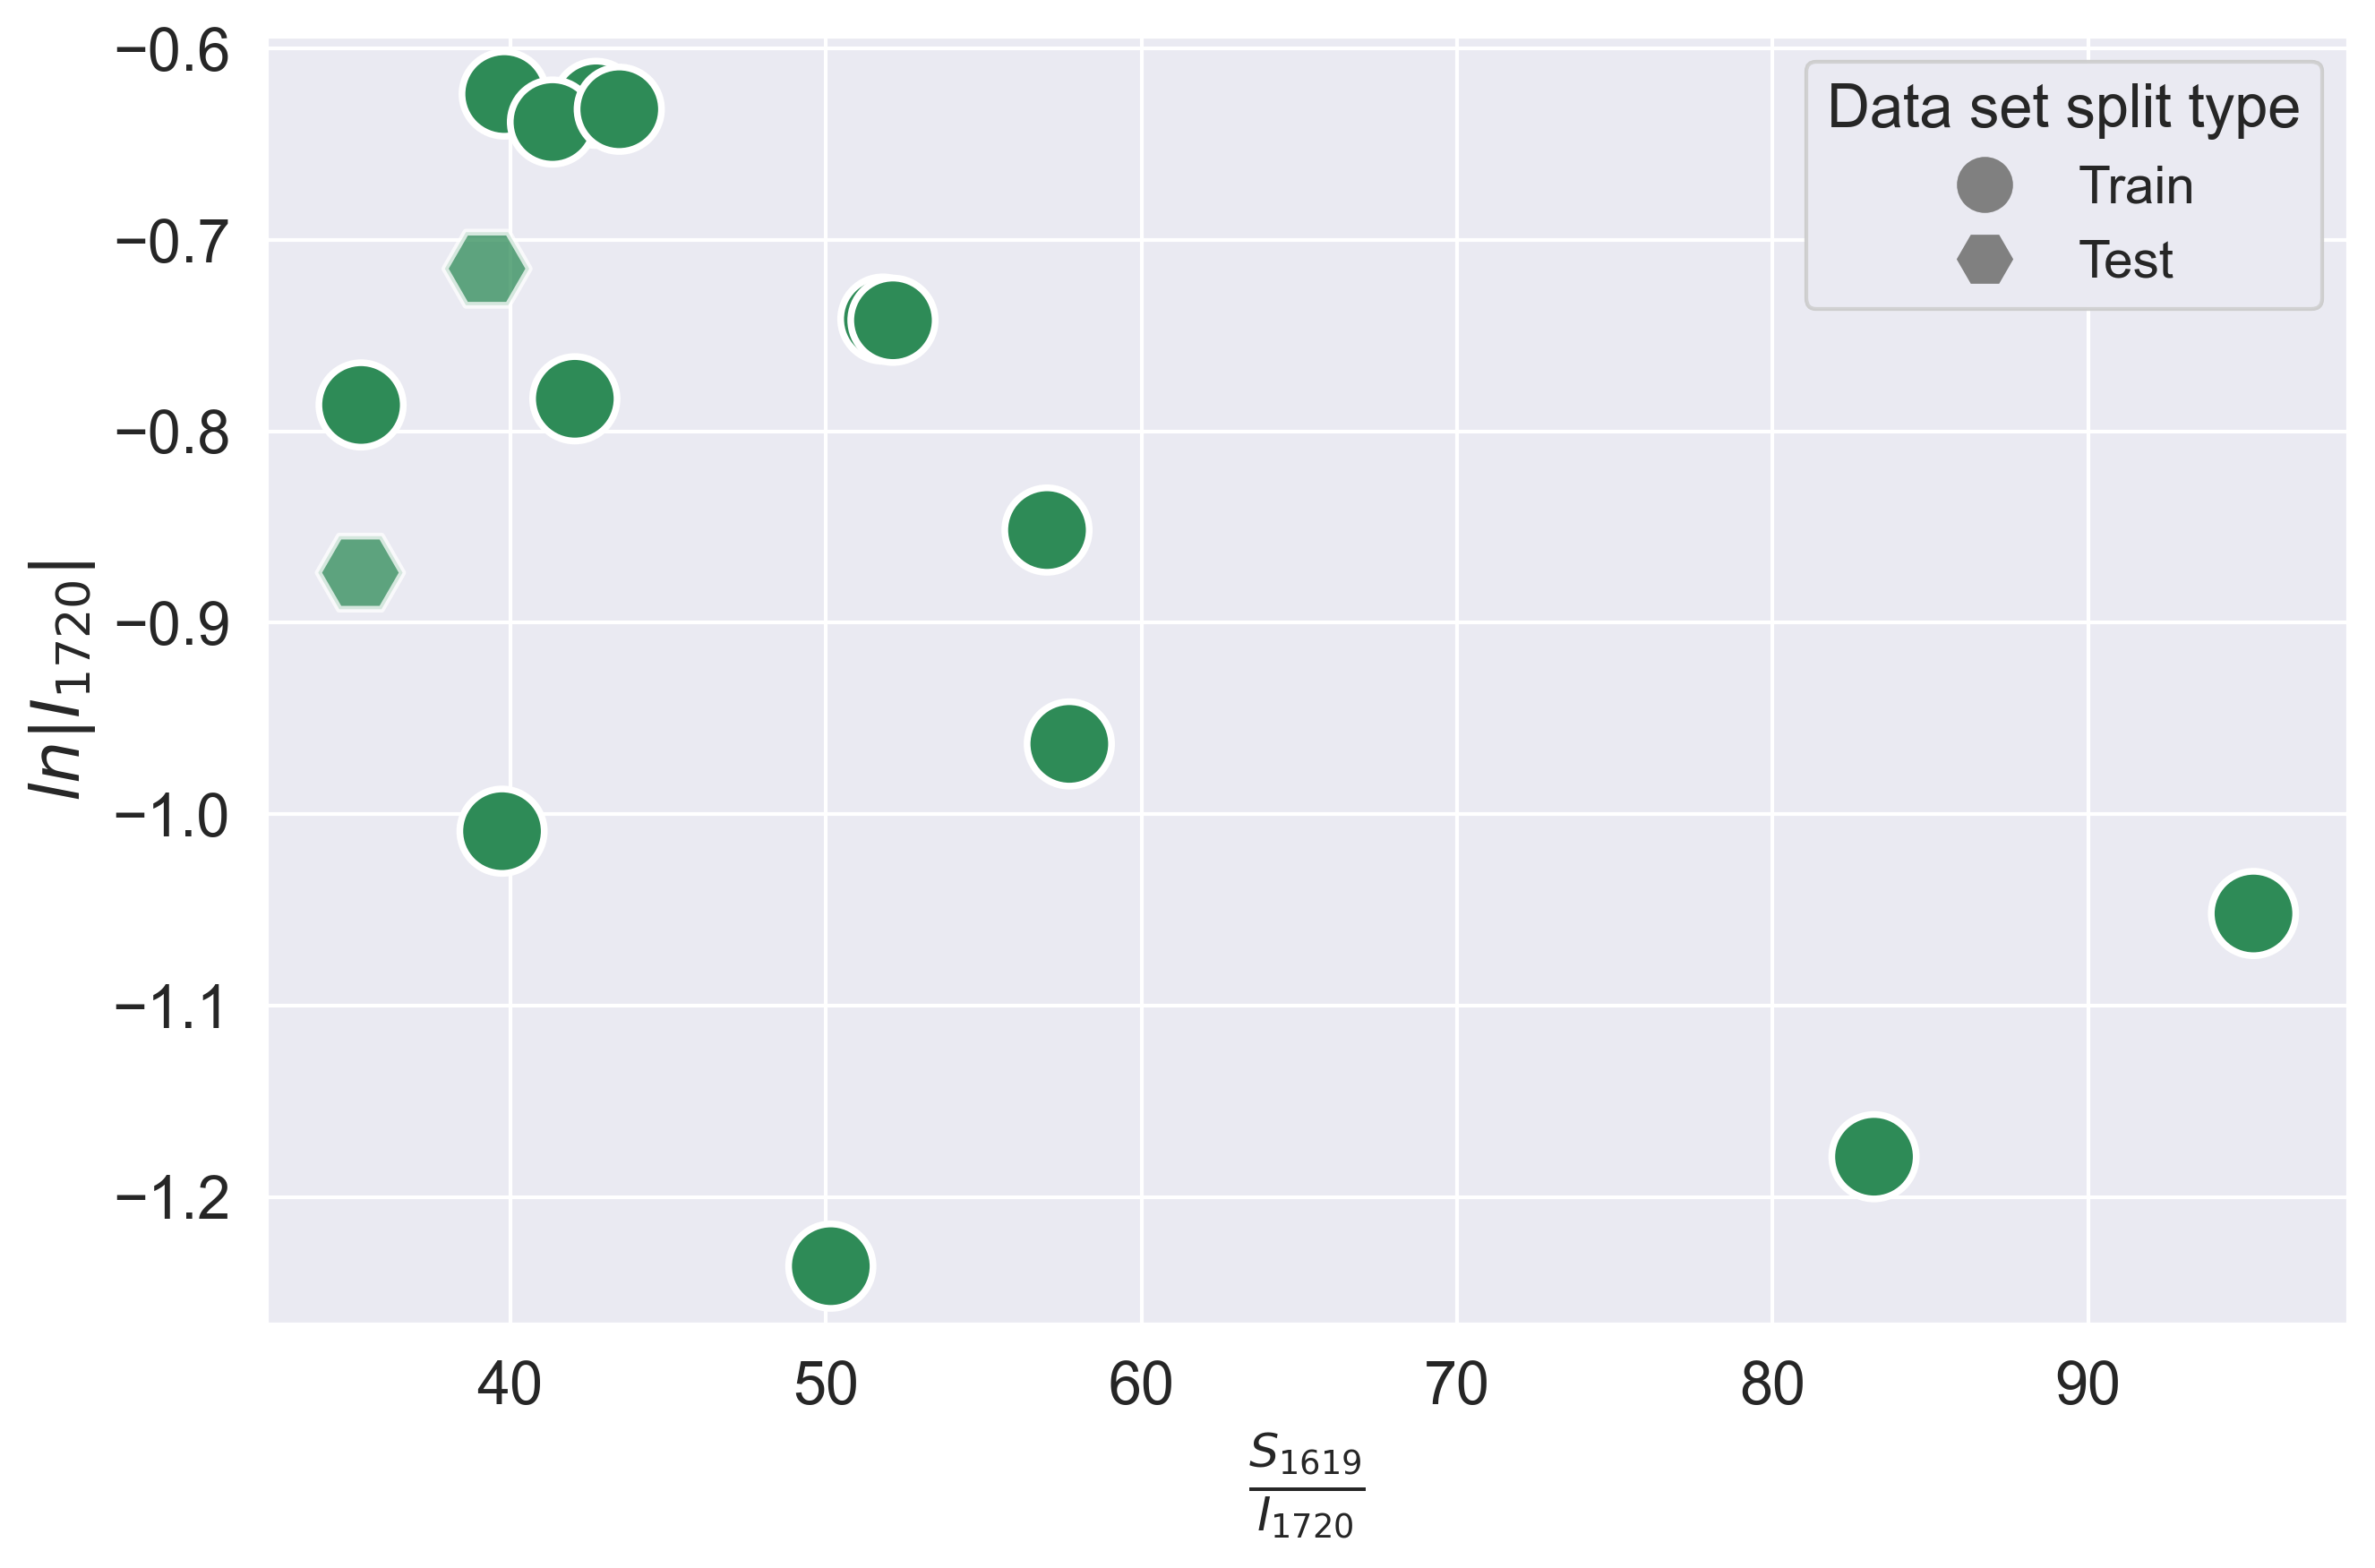

In [79]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)
ax.grid(True)

unique_types = vis_data['Type'].unique()
palette = {type_: class_color_dict[type_] for type_ in unique_types}

marker_dict = {'Train': 'o', 'Test': 'H'}
alpha_dict = {'Train': 1.0, 'Test': 0.75}

for label in vis_data['Label'].unique():
    subset = vis_data[vis_data['Label'] == label]
    
    sns.scatterplot(
        data=subset,
        x=model_factors[0],
        y=model_factors[1],
        hue=subset['Type'],
        palette=palette,
        style=subset['Label'],
        markers=marker_dict,
        s=512,
        alpha=alpha_dict[label],
        ax=ax
    )

ax.set_xlabel(model_factors[0], fontsize=fontsize)
ax.set_ylabel(model_factors[1], fontsize=fontsize)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='both', which='major', labelsize=fontsize - 2)

# Legend for 'Label'
unique_labels = ['Train', 'Test']
handles_label = [
    plt.Line2D(
        [0], [0], 
        color='gray', 
        marker=marker_dict[label], 
        linestyle='', 
        markersize=14
    ) 
    for label in unique_labels
]

legend_label = ax.legend(
    handles_label,
    unique_labels,
    title="Data set split type",
    loc='upper right',
    fontsize=fontsize - 4,
    title_fontsize=fontsize - 2,
)

ax.add_artist(legend_label)

plt.tight_layout()

plt.savefig(f'{path_to_save}/scatterplot_train_val_god.png', dpi=600)

plt.show()